In [53]:
import pandas as pd
import numpy as np
import glob

In [54]:
# Import crime data
path = 'data/crime'
filenames = glob.glob(path + "/*/*.csv")
crime_df = pd.concat((pd.read_csv(f) for f in filenames), ignore_index=True)

In [66]:
# Count crimes per LSOA
totalcrime_df = crime_df.groupby(['LSOA code']).size().to_frame('crimes')

In [78]:
# Import IOD data
path = 'data/iod/File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv'
iod_df = pd.read_csv(path)

In [79]:
# Keep LSOA code and score columns only
cols = iod_df.columns
cols = [col for col in cols if 'Score' in col]
cols = ['LSOA code (2011)'] + cols
# Rename and add index
iod_df = iod_df[cols]
iod_df.rename(columns={'LSOA code (2011)': 'LSOA code'}, inplace=True)
iod_df = iod_df.set_index(['LSOA code'])

In [83]:
# Merge iod and totalcrime data frames
data_df = iod_df.merge(totalcrime_df, left_index=True, right_index=True)

In [91]:
# Get data to arrays
# TODO: scale data?
# TODO: drop crime score?
# TODO: split training/test sets.
X = data_df.drop('crimes', axis=1).values
y = data_df['crimes']

In [92]:
# Train a simple ridge regression model
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [102]:
# Train an SVM regression (polynomial kernel)
from sklearn import svm
reg = svm.SVR()

In [103]:
# Train model
reg.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [100]:
# Predict and calculate R^2
y_pred = reg.predict(X)
R2 = reg.score(X,y)
R2

0.26075419605595751

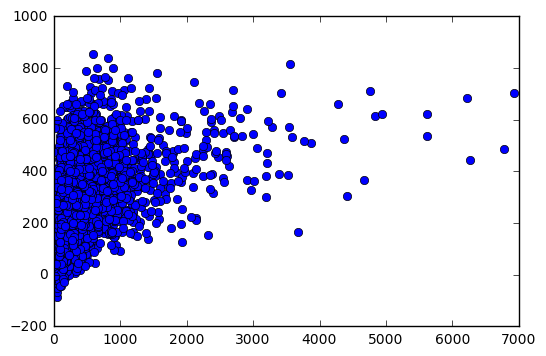

In [101]:
# Plot predictions vs actuals
import matplotlib.pyplot as plt
plt.plot(y, y_pred,'o')
plt.show()